# Assigment 2: Deep Learning

## Generate Dataset

This is the same code from Assignment 1

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=10000, n_features=5, noise=5, random_state=4)

# Split the data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


## Visualize Dataset
This is the same code from Assignment 1

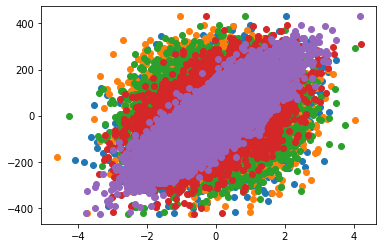

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
for i in range(5):
  plt.scatter(X_train[:,i], y_train)

## Model Definition

Using TensorFlow, build a model with the following definition:
> Input of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 1 \\

Use Mean Square Error Loss and Stochaistic Gradient Descent (SGD) Optimizer

Use Gradient Decay with appropriate parameters

In [7]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(5,input_dim=5,activation='relu'),
    keras.layers.Dense(5,activation='relu'),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error',optimizer = tf.keras.optimizers.SGD(0.001))

history =model.fit(X_train,y_train,epochs=50,validation_split = 0.2,verbose=2)

predictions = model.predict(X_test)

Epoch 1/50
200/200 - 1s - loss: 6624.9556 - val_loss: 6302.9902 - 615ms/epoch - 3ms/step
Epoch 2/50
200/200 - 0s - loss: 6150.9282 - val_loss: 5071.2856 - 301ms/epoch - 2ms/step
Epoch 3/50
200/200 - 0s - loss: 5259.7192 - val_loss: 3998.2407 - 296ms/epoch - 1ms/step
Epoch 4/50
200/200 - 0s - loss: 4089.7686 - val_loss: 3505.0034 - 283ms/epoch - 1ms/step
Epoch 5/50
200/200 - 0s - loss: 3198.9309 - val_loss: 2930.8735 - 303ms/epoch - 2ms/step
Epoch 6/50
200/200 - 0s - loss: 2770.8025 - val_loss: 2551.4763 - 282ms/epoch - 1ms/step
Epoch 7/50
200/200 - 0s - loss: 2443.4822 - val_loss: 2278.7266 - 296ms/epoch - 1ms/step
Epoch 8/50
200/200 - 0s - loss: 2267.1257 - val_loss: 2075.3818 - 431ms/epoch - 2ms/step
Epoch 9/50
200/200 - 0s - loss: 2032.6425 - val_loss: 1866.4230 - 465ms/epoch - 2ms/step
Epoch 10/50
200/200 - 0s - loss: 1970.3121 - val_loss: 1702.9056 - 475ms/epoch - 2ms/step
Epoch 11/50
200/200 - 0s - loss: 2103.9932 - val_loss: 1509.5067 - 465ms/epoch - 2ms/step
Epoch 12/50
200/200

## Plot Loss

Using matplotlib visualise how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.<br>We ideally want the loss to be constant over the last few iterations.

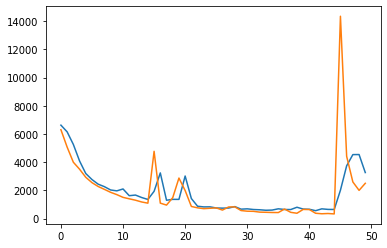

In [8]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

## Evaluation Metrics
Use the R2 Score function implemented in the first assignment to evaluate the performance of the model.

In [11]:
def r2_score(y_true, y_pred):
      # return the r2 score
      y_mean = y_true.mean()
      return 1-(((y_true - y_pred)**2).mean())/(((y_true - y_mean)**2).mean())

accu = r2_score(y_test, predictions.flatten()) # Pass appropriate parts of dataset
print("Accuracy:", accu)

Accuracy: 0.8264360170321686


## Your own custom model
Build a custom model of your own choice.<br>
Describe it in detail in Markdown/Latex in the cell below.<br>
Visualise the loss, as before.

Input of shape 5 with Dense layer of shape - 15 , 10 , 1 

In [14]:
model_custom = keras.Sequential([
      keras.layers.Dense(64,input_dim=5,activation='relu'),
      keras.layers.Dense(15,activation='relu'),
      keras.layers.Dense(10,activation='relu'),
      keras.layers.Dense(1)
])
model_custom.compile(
       optimizer=tf.optimizers.Adam(learning_rate=0.01),
       loss='mean_absolute_error')

history_custom =model_custom.fit(
    X_train,y_train,
    validation_split=0.2,
    verbose=2, epochs=50)

Epoch 1/50
200/200 - 1s - loss: 22.5330 - val_loss: 6.2331 - 817ms/epoch - 4ms/step
Epoch 2/50
200/200 - 0s - loss: 5.0685 - val_loss: 5.1068 - 361ms/epoch - 2ms/step
Epoch 3/50
200/200 - 0s - loss: 4.8263 - val_loss: 4.6280 - 373ms/epoch - 2ms/step
Epoch 4/50
200/200 - 0s - loss: 4.9144 - val_loss: 5.2845 - 360ms/epoch - 2ms/step
Epoch 5/50
200/200 - 0s - loss: 4.7242 - val_loss: 5.0912 - 353ms/epoch - 2ms/step
Epoch 6/50
200/200 - 0s - loss: 4.5380 - val_loss: 4.6995 - 351ms/epoch - 2ms/step
Epoch 7/50
200/200 - 0s - loss: 4.5603 - val_loss: 4.5760 - 379ms/epoch - 2ms/step
Epoch 8/50
200/200 - 0s - loss: 4.7304 - val_loss: 4.5532 - 341ms/epoch - 2ms/step
Epoch 9/50
200/200 - 0s - loss: 4.7333 - val_loss: 4.7994 - 351ms/epoch - 2ms/step
Epoch 10/50
200/200 - 0s - loss: 4.6386 - val_loss: 4.8108 - 360ms/epoch - 2ms/step
Epoch 11/50
200/200 - 0s - loss: 4.5737 - val_loss: 4.8228 - 391ms/epoch - 2ms/step
Epoch 12/50
200/200 - 1s - loss: 4.6135 - val_loss: 4.2908 - 595ms/epoch - 3ms/step


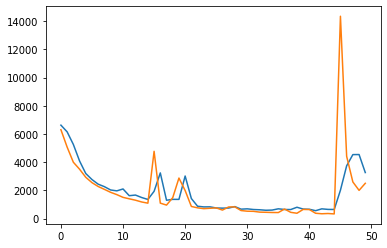

In [15]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

In [16]:
predictions_custom = model_custom.predict(X_test)
r2_score(y_test,predictions_custom.flatten())

0.9971884682775427